### Vision: A Digital Twin for the Stockholm Archipelago Trail (SAT)
* Issue [#202](https://github.com/salgo60/Stockholm_Archipelago_Trail/issues/202)
* this [notebook](https://github.com/salgo60/Stockholm_Archipelago_Trail/tree/main/notebook/SAT202_Digital_twin.ipynb)

In [1]:
import time

from datetime import datetime

now = datetime.now()
timestamp = now.timestamp()

start_time = time.time()
print("Start:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Start: 2025-09-28 22:33:18


In [2]:
import os

current_dir = os.getcwd()
print(current_dir)

/Users/salgo/Documents/GitHub/Stockholm_Archipelago_Trail/notebook


In [14]:
import geopandas as gpd

# 1. Load SAT trail sections
sat = gpd.read_file("SAT_full.geojson")

# 2. Ensure projected CRS (Sweden: SWEREF99 TM EPSG:3006)
if sat.crs.is_geographic:
    sat = sat.to_crs(epsg=3006)

# 3. Validate/fix geometries
sat["geometry"] = sat["geometry"].buffer(0)

# 4. Create 500 m buffer
sat["geometry_buffer"] = sat.geometry.buffer(500)

# 5. Clean buffer geometries too
sat["geometry_buffer"] = sat["geometry_buffer"].buffer(0)

print(sat.head())


    OSM_REL         QID      Labelsv      Labelen  \
0  19012436  Q133374147  SAT Arholma  SAT Arholma   
1  19012436  Q133374147  SAT Arholma  SAT Arholma   
2  19012436  Q133374147  SAT Arholma  SAT Arholma   
3  19012436  Q133374147  SAT Arholma  SAT Arholma   
4  19012436  Q133374147  SAT Arholma  SAT Arholma   

                                          website_sv  \
0  https://stockholmarchipelagotrail.com/sv/secti...   
1  https://stockholmarchipelagotrail.com/sv/secti...   
2  https://stockholmarchipelagotrail.com/sv/secti...   
3  https://stockholmarchipelagotrail.com/sv/secti...   
4  https://stockholmarchipelagotrail.com/sv/secti...   

                                          website_en  \
0  https://stockholmarchipelagotrail.com/section/...   
1  https://stockholmarchipelagotrail.com/section/...   
2  https://stockholmarchipelagotrail.com/section/...   
3  https://stockholmarchipelagotrail.com/section/...   
4  https://stockholmarchipelagotrail.com/section/...   

       

In [18]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import warnings

# Suppress Shapely warnings about invalid geometries
warnings.filterwarnings("ignore", category=RuntimeWarning)

# 1. Load SAT trail sections
sat = gpd.read_file("SAT_full.geojson")

# 2. Ensure projected CRS (meters, not degrees)
if sat.crs.is_geographic:
    sat = sat.to_crs(epsg=3006)  # SWEREF99 TM

# 3. Clean geometries (fix self-intersections etc.)
sat["geometry"] = sat["geometry"].buffer(0)

# 4. Create 500 m buffer per section
sat["geometry_buffer"] = sat.geometry.buffer(500)
sat["geometry_buffer"] = sat["geometry_buffer"].buffer(0)  # clean again

# 5. Define OSM categories to fetch
tags = {
    "Toilets": {"amenity": "toilets"},
    "Drinking_water": {"amenity": "drinking_water"},
    "Grocery": {"shop": ["supermarket", "convenience"]},
    "Restaurants": {"amenity": "restaurant"},
    "Pubs": {"amenity": "pub"},
    "Churches": {"amenity": "place_of_worship"},
    "Cemeteries": {"landuse": "cemetery"},
    "Hembygdsgård": {"building": "community_centre"},
}

# 6. Query OSM for each section
results = []

for idx, row in sat.iterrows():
    section_name = row["name"] if "name" in sat.columns else f"Etapp {idx+1}"
    buffer_geom = row["geometry_buffer"]

    if buffer_geom is None or buffer_geom.is_empty or not buffer_geom.is_valid:
        print(f"⚠️ Skipping {section_name} (invalid buffer)")
        continue

    section_counts = {"Section": section_name}

    for cat, filter_tags in tags.items():
        try:
            gdf = ox.features_from_polygon(buffer_geom, tags=filter_tags)

            if gdf is not None and not gdf.empty:
                gdf = gdf[gdf.intersects(buffer_geom)]
                section_counts[cat] = len(gdf)
            else:
                section_counts[cat] = 0

        except Exception as e:
            print(f"⚠️ Error fetching {cat} for section {section_name}: {e}")
            section_counts[cat] = 0

    results.append(section_counts)

df = pd.DataFrame(results)

if df.empty:
    print("⚠️ No valid results. Check SAT_full.geojson geometries and CRS.")
else:
    print(df.head())


# 7. Create DataFrame
df = pd.DataFrame(results)
print(df.head())

# 8. Plot stacked bar chart
df.set_index("Section").plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    colormap="tab20"
)

plt.title("OSM Amenities & Cultural Heritage within 500m of SAT Trail")
plt.ylabel("Count of objects")
plt.xticks(rotation=20, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


⚠️ Skipping Etapp 1 (invalid buffer)
⚠️ Skipping Etapp 2 (invalid buffer)
⚠️ Skipping Etapp 3 (invalid buffer)
⚠️ Skipping Etapp 4 (invalid buffer)
⚠️ Skipping Etapp 5 (invalid buffer)
⚠️ Skipping Etapp 6 (invalid buffer)
⚠️ Skipping Etapp 7 (invalid buffer)
⚠️ Skipping Etapp 8 (invalid buffer)
⚠️ Skipping Etapp 9 (invalid buffer)
⚠️ Skipping Etapp 10 (invalid buffer)
⚠️ Skipping Etapp 11 (invalid buffer)
⚠️ Skipping Etapp 12 (invalid buffer)
⚠️ Skipping Etapp 13 (invalid buffer)
⚠️ Skipping Etapp 14 (invalid buffer)
⚠️ Skipping Etapp 15 (invalid buffer)
⚠️ Skipping Etapp 16 (invalid buffer)
⚠️ Skipping Etapp 17 (invalid buffer)
⚠️ Skipping Etapp 18 (invalid buffer)
⚠️ Skipping Etapp 19 (invalid buffer)
⚠️ Skipping Etapp 20 (invalid buffer)
⚠️ Skipping Etapp 21 (invalid buffer)
⚠️ Skipping Etapp 22 (invalid buffer)
⚠️ Skipping Etapp 23 (invalid buffer)
⚠️ Skipping Etapp 24 (invalid buffer)
⚠️ Skipping Etapp 25 (invalid buffer)
⚠️ Skipping Etapp 26 (invalid buffer)
⚠️ Skipping Etapp 27 

KeyError: "None of ['Section'] are in the columns"

In [ ]:
sat["geometry_buffer"] = sat.geometry.buffer(500)

tags = {
    "Toilets": {"amenity": "toilets"},
    "Drinking_water": {"amenity": "drinking_water"},
    "Grocery": {"shop": ["supermarket", "convenience"]},
    "Restaurants": {"amenity": "restaurant"},
    "Pubs": {"amenity": "pub"},
    "Churches": {"amenity": "place_of_worship"},
    "Cemeteries": {"landuse": "cemetery"},
    "Hembygdsgård": {"building": "community_centre"}
}


In [10]:
for idx, row in sat.iterrows():
    buffer_geom = row["geometry_buffer"]

    section_counts = {"Section": row.get("name", f"Etapp {idx+1}")}

    for cat, filter_tags in tags.items():
        try:
            gdf = ox.features_from_polygon(buffer_geom, tags=filter_tags)

            # Only keep features inside buffer
            gdf = gdf[gdf.intersects(buffer_geom)]

            section_counts[cat] = len(gdf)
        except Exception as e:
            print(f"Error fetching {cat} for section {row.get('name', idx)}: {e}")
            section_counts[cat] = 0

    results.append(section_counts)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Toilets for section 0: cannot convert float NaN to integer
Error fetching Drinking_water for section 0: cannot convert float NaN to integer
Error fetching Grocery for section 0: cannot convert float NaN to integer
Error fetching Restaurants for section 0: cannot convert float NaN to integer
Error fetching Pubs for section 0: cannot convert float NaN to integer
Error fetching Churches for section 0: cannot convert float NaN to integer
Error fetching Cemeteries for section 0: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 0: cannot convert float NaN to integer
Error fetching Toilets for section 1: cannot convert float NaN to integer
Error fetching Drinking_water for section 1: cannot convert float NaN to integer
Error fetching Grocery for section 1: cannot convert float NaN to integer
Error fetching Restaurants for section 1: cannot convert float NaN to integer
Error fetching Pubs for section 1: cannot convert float NaN to integer
Error fetchin

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Toilets for section 14: cannot convert float NaN to integer
Error fetching Drinking_water for section 14: cannot convert float NaN to integer
Error fetching Grocery for section 14: cannot convert float NaN to integer
Error fetching Restaurants for section 14: cannot convert float NaN to integer
Error fetching Pubs for section 14: cannot convert float NaN to integer
Error fetching Churches for section 14: cannot convert float NaN to integer
Error fetching Cemeteries for section 14: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 14: cannot convert float NaN to integer
Error fetching Toilets for section 15: cannot convert float NaN to integer
Error fetching Drinking_water for section 15: cannot convert float NaN to integer
Error fetching Grocery for section 15: cannot convert float NaN to integer
Error fetching Restaurants for section 15: cannot convert float NaN to integer
Error fetching Pubs for section 15: cannot convert float NaN to integer


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Churches for section 28: cannot convert float NaN to integer
Error fetching Cemeteries for section 28: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 28: cannot convert float NaN to integer
Error fetching Toilets for section 29: cannot convert float NaN to integer
Error fetching Drinking_water for section 29: cannot convert float NaN to integer
Error fetching Grocery for section 29: cannot convert float NaN to integer
Error fetching Restaurants for section 29: cannot convert float NaN to integer
Error fetching Pubs for section 29: cannot convert float NaN to integer
Error fetching Churches for section 29: cannot convert float NaN to integer
Error fetching Cemeteries for section 29: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 29: cannot convert float NaN to integer
Error fetching Toilets for section 30: cannot convert float NaN to integer
Error fetching Drinking_water for section 30: cannot convert float NaN to 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Pubs for section 43: cannot convert float NaN to integer
Error fetching Churches for section 43: cannot convert float NaN to integer
Error fetching Cemeteries for section 43: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 43: cannot convert float NaN to integer
Error fetching Toilets for section 44: cannot convert float NaN to integer
Error fetching Drinking_water for section 44: cannot convert float NaN to integer
Error fetching Grocery for section 44: cannot convert float NaN to integer
Error fetching Restaurants for section 44: cannot convert float NaN to integer
Error fetching Pubs for section 44: cannot convert float NaN to integer
Error fetching Churches for section 44: cannot convert float NaN to integer
Error fetching Cemeteries for section 44: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 44: cannot convert float NaN to integer
Error fetching Toilets for section 45: cannot convert float NaN to integer
Er

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Pubs for section 58: cannot convert float NaN to integer
Error fetching Churches for section 58: cannot convert float NaN to integer
Error fetching Cemeteries for section 58: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 58: cannot convert float NaN to integer
Error fetching Toilets for section 59: cannot convert float NaN to integer
Error fetching Drinking_water for section 59: cannot convert float NaN to integer
Error fetching Grocery for section 59: cannot convert float NaN to integer
Error fetching Restaurants for section 59: cannot convert float NaN to integer
Error fetching Pubs for section 59: cannot convert float NaN to integer
Error fetching Churches for section 59: cannot convert float NaN to integer
Error fetching Cemeteries for section 59: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 59: cannot convert float NaN to integer
Error fetching Toilets for section 60: cannot convert float NaN to integer
Er

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Toilets for section 72: cannot convert float NaN to integer
Error fetching Drinking_water for section 72: cannot convert float NaN to integer
Error fetching Grocery for section 72: cannot convert float NaN to integer
Error fetching Restaurants for section 72: cannot convert float NaN to integer
Error fetching Pubs for section 72: cannot convert float NaN to integer
Error fetching Churches for section 72: cannot convert float NaN to integer
Error fetching Cemeteries for section 72: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 72: cannot convert float NaN to integer
Error fetching Toilets for section 73: cannot convert float NaN to integer
Error fetching Drinking_water for section 73: cannot convert float NaN to integer
Error fetching Grocery for section 73: cannot convert float NaN to integer
Error fetching Restaurants for section 73: cannot convert float NaN to integer
Error fetching Pubs for section 73: cannot convert float NaN to integer


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Pubs for section 86: cannot convert float NaN to integer
Error fetching Churches for section 86: cannot convert float NaN to integer
Error fetching Cemeteries for section 86: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 86: cannot convert float NaN to integer
Error fetching Toilets for section 87: cannot convert float NaN to integer
Error fetching Drinking_water for section 87: cannot convert float NaN to integer
Error fetching Grocery for section 87: cannot convert float NaN to integer
Error fetching Restaurants for section 87: cannot convert float NaN to integer
Error fetching Pubs for section 87: cannot convert float NaN to integer
Error fetching Churches for section 87: cannot convert float NaN to integer
Error fetching Cemeteries for section 87: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 87: cannot convert float NaN to integer
Error fetching Toilets for section 88: cannot convert float NaN to integer
Er

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Hembygdsgård for section 100: cannot convert float NaN to integer
Error fetching Toilets for section 101: cannot convert float NaN to integer
Error fetching Drinking_water for section 101: cannot convert float NaN to integer
Error fetching Grocery for section 101: cannot convert float NaN to integer
Error fetching Restaurants for section 101: cannot convert float NaN to integer
Error fetching Pubs for section 101: cannot convert float NaN to integer
Error fetching Churches for section 101: cannot convert float NaN to integer
Error fetching Cemeteries for section 101: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 101: cannot convert float NaN to integer
Error fetching Toilets for section 102: cannot convert float NaN to integer
Error fetching Drinking_water for section 102: cannot convert float NaN to integer
Error fetching Grocery for section 102: cannot convert float NaN to integer
Error fetching Restaurants for section 102: cannot convert 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Pubs for section 115: cannot convert float NaN to integer
Error fetching Churches for section 115: cannot convert float NaN to integer
Error fetching Cemeteries for section 115: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 115: cannot convert float NaN to integer
Error fetching Toilets for section 116: cannot convert float NaN to integer
Error fetching Drinking_water for section 116: cannot convert float NaN to integer
Error fetching Grocery for section 116: cannot convert float NaN to integer
Error fetching Restaurants for section 116: cannot convert float NaN to integer
Error fetching Pubs for section 116: cannot convert float NaN to integer
Error fetching Churches for section 116: cannot convert float NaN to integer
Error fetching Cemeteries for section 116: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 116: cannot convert float NaN to integer
Error fetching Toilets for section 117: cannot convert float NaN 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Toilets for section 130: cannot convert float NaN to integer
Error fetching Drinking_water for section 130: cannot convert float NaN to integer
Error fetching Grocery for section 130: cannot convert float NaN to integer
Error fetching Restaurants for section 130: cannot convert float NaN to integer
Error fetching Pubs for section 130: cannot convert float NaN to integer
Error fetching Churches for section 130: cannot convert float NaN to integer
Error fetching Cemeteries for section 130: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 130: cannot convert float NaN to integer
Error fetching Toilets for section 131: cannot convert float NaN to integer
Error fetching Drinking_water for section 131: cannot convert float NaN to integer
Error fetching Grocery for section 131: cannot convert float NaN to integer
Error fetching Restaurants for section 131: cannot convert float NaN to integer
Error fetching Pubs for section 131: cannot convert float Na

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Grocery for section 144: cannot convert float NaN to integer
Error fetching Restaurants for section 144: cannot convert float NaN to integer
Error fetching Pubs for section 144: cannot convert float NaN to integer
Error fetching Churches for section 144: cannot convert float NaN to integer
Error fetching Cemeteries for section 144: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 144: cannot convert float NaN to integer
Error fetching Toilets for section 145: cannot convert float NaN to integer
Error fetching Drinking_water for section 145: cannot convert float NaN to integer
Error fetching Grocery for section 145: cannot convert float NaN to integer
Error fetching Restaurants for section 145: cannot convert float NaN to integer
Error fetching Pubs for section 145: cannot convert float NaN to integer
Error fetching Churches for section 145: cannot convert float NaN to integer
Error fetching Cemeteries for section 145: cannot convert float NaN t

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Hembygdsgård for section 158: cannot convert float NaN to integer
Error fetching Toilets for section 159: cannot convert float NaN to integer
Error fetching Drinking_water for section 159: cannot convert float NaN to integer
Error fetching Grocery for section 159: cannot convert float NaN to integer
Error fetching Restaurants for section 159: cannot convert float NaN to integer
Error fetching Pubs for section 159: cannot convert float NaN to integer
Error fetching Churches for section 159: cannot convert float NaN to integer
Error fetching Cemeteries for section 159: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 159: cannot convert float NaN to integer
Error fetching Toilets for section 160: cannot convert float NaN to integer
Error fetching Drinking_water for section 160: cannot convert float NaN to integer
Error fetching Grocery for section 160: cannot convert float NaN to integer
Error fetching Restaurants for section 160: cannot convert 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Grocery for section 173: cannot convert float NaN to integer
Error fetching Restaurants for section 173: cannot convert float NaN to integer
Error fetching Pubs for section 173: cannot convert float NaN to integer
Error fetching Churches for section 173: cannot convert float NaN to integer
Error fetching Cemeteries for section 173: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 173: cannot convert float NaN to integer
Error fetching Toilets for section 174: cannot convert float NaN to integer
Error fetching Drinking_water for section 174: cannot convert float NaN to integer
Error fetching Grocery for section 174: cannot convert float NaN to integer
Error fetching Restaurants for section 174: cannot convert float NaN to integer
Error fetching Pubs for section 174: cannot convert float NaN to integer
Error fetching Churches for section 174: cannot convert float NaN to integer
Error fetching Cemeteries for section 174: cannot convert float NaN t

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Cemeteries for section 187: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 187: cannot convert float NaN to integer
Error fetching Toilets for section 188: cannot convert float NaN to integer
Error fetching Drinking_water for section 188: cannot convert float NaN to integer
Error fetching Grocery for section 188: cannot convert float NaN to integer
Error fetching Restaurants for section 188: cannot convert float NaN to integer
Error fetching Pubs for section 188: cannot convert float NaN to integer
Error fetching Churches for section 188: cannot convert float NaN to integer
Error fetching Cemeteries for section 188: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 188: cannot convert float NaN to integer
Error fetching Toilets for section 189: cannot convert float NaN to integer
Error fetching Drinking_water for section 189: cannot convert float NaN to integer
Error fetching Grocery for section 189: cannot convert f

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Toilets for section 202: cannot convert float NaN to integer
Error fetching Drinking_water for section 202: cannot convert float NaN to integer
Error fetching Grocery for section 202: cannot convert float NaN to integer
Error fetching Restaurants for section 202: cannot convert float NaN to integer
Error fetching Pubs for section 202: cannot convert float NaN to integer
Error fetching Churches for section 202: cannot convert float NaN to integer
Error fetching Cemeteries for section 202: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 202: cannot convert float NaN to integer
Error fetching Toilets for section 203: cannot convert float NaN to integer
Error fetching Drinking_water for section 203: cannot convert float NaN to integer
Error fetching Grocery for section 203: cannot convert float NaN to integer
Error fetching Restaurants for section 203: cannot convert float NaN to integer
Error fetching Pubs for section 203: cannot convert float Na

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Churches for section 216: cannot convert float NaN to integer
Error fetching Cemeteries for section 216: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 216: cannot convert float NaN to integer
Error fetching Toilets for section 217: cannot convert float NaN to integer
Error fetching Drinking_water for section 217: cannot convert float NaN to integer
Error fetching Grocery for section 217: cannot convert float NaN to integer
Error fetching Restaurants for section 217: cannot convert float NaN to integer
Error fetching Pubs for section 217: cannot convert float NaN to integer
Error fetching Churches for section 217: cannot convert float NaN to integer
Error fetching Cemeteries for section 217: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 217: cannot convert float NaN to integer
Error fetching Toilets for section 218: cannot convert float NaN to integer
Error fetching Drinking_water for section 218: cannot convert 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Churches for section 229: cannot convert float NaN to integer
Error fetching Cemeteries for section 229: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 229: cannot convert float NaN to integer
Error fetching Toilets for section 230: cannot convert float NaN to integer
Error fetching Drinking_water for section 230: cannot convert float NaN to integer
Error fetching Grocery for section 230: cannot convert float NaN to integer
Error fetching Restaurants for section 230: cannot convert float NaN to integer
Error fetching Pubs for section 230: cannot convert float NaN to integer
Error fetching Churches for section 230: cannot convert float NaN to integer
Error fetching Cemeteries for section 230: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 230: cannot convert float NaN to integer
Error fetching Toilets for section 231: cannot convert float NaN to integer
Error fetching Drinking_water for section 231: cannot convert 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Grocery for section 244: cannot convert float NaN to integer
Error fetching Restaurants for section 244: cannot convert float NaN to integer
Error fetching Pubs for section 244: cannot convert float NaN to integer
Error fetching Churches for section 244: cannot convert float NaN to integer
Error fetching Cemeteries for section 244: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 244: cannot convert float NaN to integer
Error fetching Toilets for section 245: cannot convert float NaN to integer
Error fetching Drinking_water for section 245: cannot convert float NaN to integer
Error fetching Grocery for section 245: cannot convert float NaN to integer
Error fetching Restaurants for section 245: cannot convert float NaN to integer
Error fetching Pubs for section 245: cannot convert float NaN to integer
Error fetching Churches for section 245: cannot convert float NaN to integer
Error fetching Cemeteries for section 245: cannot convert float NaN t

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Hembygdsgård for section 258: cannot convert float NaN to integer
Error fetching Toilets for section 259: cannot convert float NaN to integer
Error fetching Drinking_water for section 259: cannot convert float NaN to integer
Error fetching Grocery for section 259: cannot convert float NaN to integer
Error fetching Restaurants for section 259: cannot convert float NaN to integer
Error fetching Pubs for section 259: cannot convert float NaN to integer
Error fetching Churches for section 259: cannot convert float NaN to integer
Error fetching Cemeteries for section 259: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 259: cannot convert float NaN to integer
Error fetching Toilets for section 260: cannot convert float NaN to integer
Error fetching Drinking_water for section 260: cannot convert float NaN to integer
Error fetching Grocery for section 260: cannot convert float NaN to integer
Error fetching Restaurants for section 260: cannot convert 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Pubs for section 273: cannot convert float NaN to integer
Error fetching Churches for section 273: cannot convert float NaN to integer
Error fetching Cemeteries for section 273: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 273: cannot convert float NaN to integer
Error fetching Toilets for section 274: cannot convert float NaN to integer
Error fetching Drinking_water for section 274: cannot convert float NaN to integer
Error fetching Grocery for section 274: cannot convert float NaN to integer
Error fetching Restaurants for section 274: cannot convert float NaN to integer
Error fetching Pubs for section 274: cannot convert float NaN to integer
Error fetching Churches for section 274: cannot convert float NaN to integer
Error fetching Cemeteries for section 274: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 274: cannot convert float NaN to integer
Error fetching Toilets for section 275: cannot convert float NaN 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Grocery for section 288: cannot convert float NaN to integer
Error fetching Restaurants for section 288: cannot convert float NaN to integer
Error fetching Pubs for section 288: cannot convert float NaN to integer
Error fetching Churches for section 288: cannot convert float NaN to integer
Error fetching Cemeteries for section 288: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 288: cannot convert float NaN to integer
Error fetching Toilets for section 289: cannot convert float NaN to integer
Error fetching Drinking_water for section 289: cannot convert float NaN to integer
Error fetching Grocery for section 289: cannot convert float NaN to integer
Error fetching Restaurants for section 289: cannot convert float NaN to integer
Error fetching Pubs for section 289: cannot convert float NaN to integer
Error fetching Churches for section 289: cannot convert float NaN to integer
Error fetching Cemeteries for section 289: cannot convert float NaN t

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Hembygdsgård for section 302: cannot convert float NaN to integer
Error fetching Toilets for section 303: cannot convert float NaN to integer
Error fetching Drinking_water for section 303: cannot convert float NaN to integer
Error fetching Grocery for section 303: cannot convert float NaN to integer
Error fetching Restaurants for section 303: cannot convert float NaN to integer
Error fetching Pubs for section 303: cannot convert float NaN to integer
Error fetching Churches for section 303: cannot convert float NaN to integer
Error fetching Cemeteries for section 303: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 303: cannot convert float NaN to integer
Error fetching Toilets for section 304: cannot convert float NaN to integer
Error fetching Drinking_water for section 304: cannot convert float NaN to integer
Error fetching Grocery for section 304: cannot convert float NaN to integer
Error fetching Restaurants for section 304: cannot convert 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Restaurants for section 317: cannot convert float NaN to integer
Error fetching Pubs for section 317: cannot convert float NaN to integer
Error fetching Churches for section 317: cannot convert float NaN to integer
Error fetching Cemeteries for section 317: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 317: cannot convert float NaN to integer
Error fetching Toilets for section 318: cannot convert float NaN to integer
Error fetching Drinking_water for section 318: cannot convert float NaN to integer
Error fetching Grocery for section 318: cannot convert float NaN to integer
Error fetching Restaurants for section 318: cannot convert float NaN to integer
Error fetching Pubs for section 318: cannot convert float NaN to integer
Error fetching Churches for section 318: cannot convert float NaN to integer
Error fetching Cemeteries for section 318: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 318: cannot convert float 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Cemeteries for section 331: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 331: cannot convert float NaN to integer
Error fetching Toilets for section 332: cannot convert float NaN to integer
Error fetching Drinking_water for section 332: cannot convert float NaN to integer
Error fetching Grocery for section 332: cannot convert float NaN to integer
Error fetching Restaurants for section 332: cannot convert float NaN to integer
Error fetching Pubs for section 332: cannot convert float NaN to integer
Error fetching Churches for section 332: cannot convert float NaN to integer
Error fetching Cemeteries for section 332: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 332: cannot convert float NaN to integer
Error fetching Toilets for section 333: cannot convert float NaN to integer
Error fetching Drinking_water for section 333: cannot convert float NaN to integer
Error fetching Grocery for section 333: cannot convert f

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Pubs for section 346: cannot convert float NaN to integer
Error fetching Churches for section 346: cannot convert float NaN to integer
Error fetching Cemeteries for section 346: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 346: cannot convert float NaN to integer
Error fetching Toilets for section 347: cannot convert float NaN to integer
Error fetching Drinking_water for section 347: cannot convert float NaN to integer
Error fetching Grocery for section 347: cannot convert float NaN to integer
Error fetching Restaurants for section 347: cannot convert float NaN to integer
Error fetching Pubs for section 347: cannot convert float NaN to integer
Error fetching Churches for section 347: cannot convert float NaN to integer
Error fetching Cemeteries for section 347: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 347: cannot convert float NaN to integer
Error fetching Toilets for section 348: cannot convert float NaN 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Restaurants for section 361: cannot convert float NaN to integer
Error fetching Pubs for section 361: cannot convert float NaN to integer
Error fetching Churches for section 361: cannot convert float NaN to integer
Error fetching Cemeteries for section 361: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 361: cannot convert float NaN to integer
Error fetching Toilets for section 362: cannot convert float NaN to integer
Error fetching Drinking_water for section 362: cannot convert float NaN to integer
Error fetching Grocery for section 362: cannot convert float NaN to integer
Error fetching Restaurants for section 362: cannot convert float NaN to integer
Error fetching Pubs for section 362: cannot convert float NaN to integer
Error fetching Churches for section 362: cannot convert float NaN to integer
Error fetching Cemeteries for section 362: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 362: cannot convert float 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Hembygdsgård for section 375: cannot convert float NaN to integer
Error fetching Toilets for section 376: cannot convert float NaN to integer
Error fetching Drinking_water for section 376: cannot convert float NaN to integer
Error fetching Grocery for section 376: cannot convert float NaN to integer
Error fetching Restaurants for section 376: cannot convert float NaN to integer
Error fetching Pubs for section 376: cannot convert float NaN to integer
Error fetching Churches for section 376: cannot convert float NaN to integer
Error fetching Cemeteries for section 376: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 376: cannot convert float NaN to integer
Error fetching Toilets for section 377: cannot convert float NaN to integer
Error fetching Drinking_water for section 377: cannot convert float NaN to integer
Error fetching Grocery for section 377: cannot convert float NaN to integer
Error fetching Restaurants for section 377: cannot convert 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Pubs for section 390: cannot convert float NaN to integer
Error fetching Churches for section 390: cannot convert float NaN to integer
Error fetching Cemeteries for section 390: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 390: cannot convert float NaN to integer
Error fetching Toilets for section 391: cannot convert float NaN to integer
Error fetching Drinking_water for section 391: cannot convert float NaN to integer
Error fetching Grocery for section 391: cannot convert float NaN to integer
Error fetching Restaurants for section 391: cannot convert float NaN to integer
Error fetching Pubs for section 391: cannot convert float NaN to integer
Error fetching Churches for section 391: cannot convert float NaN to integer
Error fetching Cemeteries for section 391: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 391: cannot convert float NaN to integer
Error fetching Toilets for section 392: cannot convert float NaN 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Drinking_water for section 405: cannot convert float NaN to integer
Error fetching Grocery for section 405: cannot convert float NaN to integer
Error fetching Restaurants for section 405: cannot convert float NaN to integer
Error fetching Pubs for section 405: cannot convert float NaN to integer
Error fetching Churches for section 405: cannot convert float NaN to integer
Error fetching Cemeteries for section 405: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 405: cannot convert float NaN to integer
Error fetching Toilets for section 406: cannot convert float NaN to integer
Error fetching Drinking_water for section 406: cannot convert float NaN to integer
Error fetching Grocery for section 406: cannot convert float NaN to integer
Error fetching Restaurants for section 406: cannot convert float NaN to integer
Error fetching Pubs for section 406: cannot convert float NaN to integer
Error fetching Churches for section 406: cannot convert float N

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Cemeteries for section 419: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 419: cannot convert float NaN to integer
Error fetching Toilets for section 420: cannot convert float NaN to integer
Error fetching Drinking_water for section 420: cannot convert float NaN to integer
Error fetching Grocery for section 420: cannot convert float NaN to integer
Error fetching Restaurants for section 420: cannot convert float NaN to integer
Error fetching Pubs for section 420: cannot convert float NaN to integer
Error fetching Churches for section 420: cannot convert float NaN to integer
Error fetching Cemeteries for section 420: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 420: cannot convert float NaN to integer
Error fetching Toilets for section 421: cannot convert float NaN to integer
Error fetching Drinking_water for section 421: cannot convert float NaN to integer
Error fetching Grocery for section 421: cannot convert f

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Restaurants for section 434: cannot convert float NaN to integer
Error fetching Pubs for section 434: cannot convert float NaN to integer
Error fetching Churches for section 434: cannot convert float NaN to integer
Error fetching Cemeteries for section 434: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 434: cannot convert float NaN to integer
Error fetching Toilets for section 435: cannot convert float NaN to integer
Error fetching Drinking_water for section 435: cannot convert float NaN to integer
Error fetching Grocery for section 435: cannot convert float NaN to integer
Error fetching Restaurants for section 435: cannot convert float NaN to integer
Error fetching Pubs for section 435: cannot convert float NaN to integer
Error fetching Churches for section 435: cannot convert float NaN to integer
Error fetching Cemeteries for section 435: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 435: cannot convert float 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Hembygdsgård for section 448: cannot convert float NaN to integer
Error fetching Toilets for section 449: cannot convert float NaN to integer
Error fetching Drinking_water for section 449: cannot convert float NaN to integer
Error fetching Grocery for section 449: cannot convert float NaN to integer
Error fetching Restaurants for section 449: cannot convert float NaN to integer
Error fetching Pubs for section 449: cannot convert float NaN to integer
Error fetching Churches for section 449: cannot convert float NaN to integer
Error fetching Cemeteries for section 449: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 449: cannot convert float NaN to integer
Error fetching Toilets for section 450: cannot convert float NaN to integer
Error fetching Drinking_water for section 450: cannot convert float NaN to integer
Error fetching Grocery for section 450: cannot convert float NaN to integer
Error fetching Restaurants for section 450: cannot convert 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Churches for section 463: cannot convert float NaN to integer
Error fetching Cemeteries for section 463: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 463: cannot convert float NaN to integer
Error fetching Toilets for section 464: cannot convert float NaN to integer
Error fetching Drinking_water for section 464: cannot convert float NaN to integer
Error fetching Grocery for section 464: cannot convert float NaN to integer
Error fetching Restaurants for section 464: cannot convert float NaN to integer
Error fetching Pubs for section 464: cannot convert float NaN to integer
Error fetching Churches for section 464: cannot convert float NaN to integer
Error fetching Cemeteries for section 464: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 464: cannot convert float NaN to integer
Error fetching Toilets for section 465: cannot convert float NaN to integer
Error fetching Drinking_water for section 465: cannot convert 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Drinking_water for section 478: cannot convert float NaN to integer
Error fetching Grocery for section 478: cannot convert float NaN to integer
Error fetching Restaurants for section 478: cannot convert float NaN to integer
Error fetching Pubs for section 478: cannot convert float NaN to integer
Error fetching Churches for section 478: cannot convert float NaN to integer
Error fetching Cemeteries for section 478: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 478: cannot convert float NaN to integer
Error fetching Toilets for section 479: cannot convert float NaN to integer
Error fetching Drinking_water for section 479: cannot convert float NaN to integer
Error fetching Grocery for section 479: cannot convert float NaN to integer
Error fetching Restaurants for section 479: cannot convert float NaN to integer
Error fetching Pubs for section 479: cannot convert float NaN to integer
Error fetching Churches for section 479: cannot convert float N

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Cemeteries for section 492: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 492: cannot convert float NaN to integer
Error fetching Toilets for section 493: cannot convert float NaN to integer
Error fetching Drinking_water for section 493: cannot convert float NaN to integer
Error fetching Grocery for section 493: cannot convert float NaN to integer
Error fetching Restaurants for section 493: cannot convert float NaN to integer
Error fetching Pubs for section 493: cannot convert float NaN to integer
Error fetching Churches for section 493: cannot convert float NaN to integer
Error fetching Cemeteries for section 493: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 493: cannot convert float NaN to integer
Error fetching Toilets for section 494: cannot convert float NaN to integer
Error fetching Drinking_water for section 494: cannot convert float NaN to integer
Error fetching Grocery for section 494: cannot convert f

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Churches for section 507: cannot convert float NaN to integer
Error fetching Cemeteries for section 507: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 507: cannot convert float NaN to integer
Error fetching Toilets for section 508: cannot convert float NaN to integer
Error fetching Drinking_water for section 508: cannot convert float NaN to integer
Error fetching Grocery for section 508: cannot convert float NaN to integer
Error fetching Restaurants for section 508: cannot convert float NaN to integer
Error fetching Pubs for section 508: cannot convert float NaN to integer
Error fetching Churches for section 508: cannot convert float NaN to integer
Error fetching Cemeteries for section 508: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 508: cannot convert float NaN to integer
Error fetching Toilets for section 509: cannot convert float NaN to integer
Error fetching Drinking_water for section 509: cannot convert 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Pubs for section 522: cannot convert float NaN to integer
Error fetching Churches for section 522: cannot convert float NaN to integer
Error fetching Cemeteries for section 522: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 522: cannot convert float NaN to integer
Error fetching Toilets for section 523: cannot convert float NaN to integer
Error fetching Drinking_water for section 523: cannot convert float NaN to integer
Error fetching Grocery for section 523: cannot convert float NaN to integer
Error fetching Restaurants for section 523: cannot convert float NaN to integer
Error fetching Pubs for section 523: cannot convert float NaN to integer
Error fetching Churches for section 523: cannot convert float NaN to integer
Error fetching Cemeteries for section 523: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 523: cannot convert float NaN to integer
Error fetching Toilets for section 524: cannot convert float NaN 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Drinking_water for section 537: cannot convert float NaN to integer
Error fetching Grocery for section 537: cannot convert float NaN to integer
Error fetching Restaurants for section 537: cannot convert float NaN to integer
Error fetching Pubs for section 537: cannot convert float NaN to integer
Error fetching Churches for section 537: cannot convert float NaN to integer
Error fetching Cemeteries for section 537: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 537: cannot convert float NaN to integer
Error fetching Toilets for section 538: cannot convert float NaN to integer
Error fetching Drinking_water for section 538: cannot convert float NaN to integer
Error fetching Grocery for section 538: cannot convert float NaN to integer
Error fetching Restaurants for section 538: cannot convert float NaN to integer
Error fetching Pubs for section 538: cannot convert float NaN to integer
Error fetching Churches for section 538: cannot convert float N

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Cemeteries for section 551: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 551: cannot convert float NaN to integer
Error fetching Toilets for section 552: cannot convert float NaN to integer
Error fetching Drinking_water for section 552: cannot convert float NaN to integer
Error fetching Grocery for section 552: cannot convert float NaN to integer
Error fetching Restaurants for section 552: cannot convert float NaN to integer
Error fetching Pubs for section 552: cannot convert float NaN to integer
Error fetching Churches for section 552: cannot convert float NaN to integer
Error fetching Cemeteries for section 552: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 552: cannot convert float NaN to integer
Error fetching Toilets for section 553: cannot convert float NaN to integer
Error fetching Drinking_water for section 553: cannot convert float NaN to integer
Error fetching Grocery for section 553: cannot convert f

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Toilets for section 566: cannot convert float NaN to integer
Error fetching Drinking_water for section 566: cannot convert float NaN to integer
Error fetching Grocery for section 566: cannot convert float NaN to integer
Error fetching Restaurants for section 566: cannot convert float NaN to integer
Error fetching Pubs for section 566: cannot convert float NaN to integer
Error fetching Churches for section 566: cannot convert float NaN to integer
Error fetching Cemeteries for section 566: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 566: cannot convert float NaN to integer
Error fetching Toilets for section 567: cannot convert float NaN to integer
Error fetching Drinking_water for section 567: cannot convert float NaN to integer
Error fetching Grocery for section 567: cannot convert float NaN to integer
Error fetching Restaurants for section 567: cannot convert float NaN to integer
Error fetching Pubs for section 567: cannot convert float Na

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Cemeteries for section 580: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 580: cannot convert float NaN to integer
Error fetching Toilets for section 581: cannot convert float NaN to integer
Error fetching Drinking_water for section 581: cannot convert float NaN to integer
Error fetching Grocery for section 581: cannot convert float NaN to integer
Error fetching Restaurants for section 581: cannot convert float NaN to integer
Error fetching Pubs for section 581: cannot convert float NaN to integer
Error fetching Churches for section 581: cannot convert float NaN to integer
Error fetching Cemeteries for section 581: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 581: cannot convert float NaN to integer
Error fetching Toilets for section 582: cannot convert float NaN to integer
Error fetching Drinking_water for section 582: cannot convert float NaN to integer
Error fetching Grocery for section 582: cannot convert f

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Toilets for section 595: cannot convert float NaN to integer
Error fetching Drinking_water for section 595: cannot convert float NaN to integer
Error fetching Grocery for section 595: cannot convert float NaN to integer
Error fetching Restaurants for section 595: cannot convert float NaN to integer
Error fetching Pubs for section 595: cannot convert float NaN to integer
Error fetching Churches for section 595: cannot convert float NaN to integer
Error fetching Cemeteries for section 595: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 595: cannot convert float NaN to integer
Error fetching Toilets for section 596: cannot convert float NaN to integer
Error fetching Drinking_water for section 596: cannot convert float NaN to integer
Error fetching Grocery for section 596: cannot convert float NaN to integer
Error fetching Restaurants for section 596: cannot convert float NaN to integer
Error fetching Pubs for section 596: cannot convert float Na

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Restaurants for section 609: cannot convert float NaN to integer
Error fetching Pubs for section 609: cannot convert float NaN to integer
Error fetching Churches for section 609: cannot convert float NaN to integer
Error fetching Cemeteries for section 609: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 609: cannot convert float NaN to integer
Error fetching Toilets for section 610: cannot convert float NaN to integer
Error fetching Drinking_water for section 610: cannot convert float NaN to integer
Error fetching Grocery for section 610: cannot convert float NaN to integer
Error fetching Restaurants for section 610: cannot convert float NaN to integer
Error fetching Pubs for section 610: cannot convert float NaN to integer
Error fetching Churches for section 610: cannot convert float NaN to integer
Error fetching Cemeteries for section 610: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 610: cannot convert float 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Toilets for section 624: cannot convert float NaN to integer
Error fetching Drinking_water for section 624: cannot convert float NaN to integer
Error fetching Grocery for section 624: cannot convert float NaN to integer
Error fetching Restaurants for section 624: cannot convert float NaN to integer
Error fetching Pubs for section 624: cannot convert float NaN to integer
Error fetching Churches for section 624: cannot convert float NaN to integer
Error fetching Cemeteries for section 624: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 624: cannot convert float NaN to integer
Error fetching Toilets for section 625: cannot convert float NaN to integer
Error fetching Drinking_water for section 625: cannot convert float NaN to integer
Error fetching Grocery for section 625: cannot convert float NaN to integer
Error fetching Restaurants for section 625: cannot convert float NaN to integer
Error fetching Pubs for section 625: cannot convert float Na

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Pubs for section 638: cannot convert float NaN to integer
Error fetching Churches for section 638: cannot convert float NaN to integer
Error fetching Cemeteries for section 638: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 638: cannot convert float NaN to integer
Error fetching Toilets for section 639: cannot convert float NaN to integer
Error fetching Drinking_water for section 639: cannot convert float NaN to integer
Error fetching Grocery for section 639: cannot convert float NaN to integer
Error fetching Restaurants for section 639: cannot convert float NaN to integer
Error fetching Pubs for section 639: cannot convert float NaN to integer
Error fetching Churches for section 639: cannot convert float NaN to integer
Error fetching Cemeteries for section 639: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 639: cannot convert float NaN to integer
Error fetching Toilets for section 640: cannot convert float NaN 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Drinking_water for section 653: cannot convert float NaN to integer
Error fetching Grocery for section 653: cannot convert float NaN to integer
Error fetching Restaurants for section 653: cannot convert float NaN to integer
Error fetching Pubs for section 653: cannot convert float NaN to integer
Error fetching Churches for section 653: cannot convert float NaN to integer
Error fetching Cemeteries for section 653: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 653: cannot convert float NaN to integer
Error fetching Toilets for section 654: cannot convert float NaN to integer
Error fetching Drinking_water for section 654: cannot convert float NaN to integer
Error fetching Grocery for section 654: cannot convert float NaN to integer
Error fetching Restaurants for section 654: cannot convert float NaN to integer
Error fetching Pubs for section 654: cannot convert float NaN to integer
Error fetching Churches for section 654: cannot convert float N

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Restaurants for section 667: cannot convert float NaN to integer
Error fetching Pubs for section 667: cannot convert float NaN to integer
Error fetching Churches for section 667: cannot convert float NaN to integer
Error fetching Cemeteries for section 667: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 667: cannot convert float NaN to integer
Error fetching Toilets for section 668: cannot convert float NaN to integer
Error fetching Drinking_water for section 668: cannot convert float NaN to integer
Error fetching Grocery for section 668: cannot convert float NaN to integer
Error fetching Restaurants for section 668: cannot convert float NaN to integer
Error fetching Pubs for section 668: cannot convert float NaN to integer
Error fetching Churches for section 668: cannot convert float NaN to integer
Error fetching Cemeteries for section 668: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 668: cannot convert float 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Grocery for section 682: cannot convert float NaN to integer
Error fetching Restaurants for section 682: cannot convert float NaN to integer
Error fetching Pubs for section 682: cannot convert float NaN to integer
Error fetching Churches for section 682: cannot convert float NaN to integer
Error fetching Cemeteries for section 682: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 682: cannot convert float NaN to integer
Error fetching Toilets for section 683: cannot convert float NaN to integer
Error fetching Drinking_water for section 683: cannot convert float NaN to integer
Error fetching Grocery for section 683: cannot convert float NaN to integer
Error fetching Restaurants for section 683: cannot convert float NaN to integer
Error fetching Pubs for section 683: cannot convert float NaN to integer
Error fetching Churches for section 683: cannot convert float NaN to integer
Error fetching Cemeteries for section 683: cannot convert float NaN t

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Cemeteries for section 696: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 696: cannot convert float NaN to integer
Error fetching Toilets for section 697: cannot convert float NaN to integer
Error fetching Drinking_water for section 697: cannot convert float NaN to integer
Error fetching Grocery for section 697: cannot convert float NaN to integer
Error fetching Restaurants for section 697: cannot convert float NaN to integer
Error fetching Pubs for section 697: cannot convert float NaN to integer
Error fetching Churches for section 697: cannot convert float NaN to integer
Error fetching Cemeteries for section 697: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 697: cannot convert float NaN to integer
Error fetching Toilets for section 698: cannot convert float NaN to integer
Error fetching Drinking_water for section 698: cannot convert float NaN to integer
Error fetching Grocery for section 698: cannot convert f

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Drinking_water for section 711: cannot convert float NaN to integer
Error fetching Grocery for section 711: cannot convert float NaN to integer
Error fetching Restaurants for section 711: cannot convert float NaN to integer
Error fetching Pubs for section 711: cannot convert float NaN to integer
Error fetching Churches for section 711: cannot convert float NaN to integer
Error fetching Cemeteries for section 711: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 711: cannot convert float NaN to integer
Error fetching Toilets for section 712: cannot convert float NaN to integer
Error fetching Drinking_water for section 712: cannot convert float NaN to integer
Error fetching Grocery for section 712: cannot convert float NaN to integer
Error fetching Restaurants for section 712: cannot convert float NaN to integer
Error fetching Pubs for section 712: cannot convert float NaN to integer
Error fetching Churches for section 712: cannot convert float N

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Hembygdsgård for section 723: cannot convert float NaN to integer
Error fetching Toilets for section 724: cannot convert float NaN to integer
Error fetching Drinking_water for section 724: cannot convert float NaN to integer
Error fetching Grocery for section 724: cannot convert float NaN to integer
Error fetching Restaurants for section 724: cannot convert float NaN to integer
Error fetching Pubs for section 724: cannot convert float NaN to integer
Error fetching Churches for section 724: cannot convert float NaN to integer
Error fetching Cemeteries for section 724: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 724: cannot convert float NaN to integer
Error fetching Toilets for section 725: cannot convert float NaN to integer
Error fetching Drinking_water for section 725: cannot convert float NaN to integer
Error fetching Grocery for section 725: cannot convert float NaN to integer
Error fetching Restaurants for section 725: cannot convert 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Drinking_water for section 738: cannot convert float NaN to integer
Error fetching Grocery for section 738: cannot convert float NaN to integer
Error fetching Restaurants for section 738: cannot convert float NaN to integer
Error fetching Pubs for section 738: cannot convert float NaN to integer
Error fetching Churches for section 738: cannot convert float NaN to integer
Error fetching Cemeteries for section 738: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 738: cannot convert float NaN to integer
Error fetching Toilets for section 739: cannot convert float NaN to integer
Error fetching Drinking_water for section 739: cannot convert float NaN to integer
Error fetching Grocery for section 739: cannot convert float NaN to integer
Error fetching Restaurants for section 739: cannot convert float NaN to integer
Error fetching Pubs for section 739: cannot convert float NaN to integer
Error fetching Churches for section 739: cannot convert float N

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Hembygdsgård for section 752: cannot convert float NaN to integer
Error fetching Toilets for section 753: cannot convert float NaN to integer
Error fetching Drinking_water for section 753: cannot convert float NaN to integer
Error fetching Grocery for section 753: cannot convert float NaN to integer
Error fetching Restaurants for section 753: cannot convert float NaN to integer
Error fetching Pubs for section 753: cannot convert float NaN to integer
Error fetching Churches for section 753: cannot convert float NaN to integer
Error fetching Cemeteries for section 753: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 753: cannot convert float NaN to integer
Error fetching Toilets for section 754: cannot convert float NaN to integer
Error fetching Drinking_water for section 754: cannot convert float NaN to integer
Error fetching Grocery for section 754: cannot convert float NaN to integer
Error fetching Restaurants for section 754: cannot convert 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

Error fetching Restaurants for section 767: cannot convert float NaN to integer
Error fetching Pubs for section 767: cannot convert float NaN to integer
Error fetching Churches for section 767: cannot convert float NaN to integer
Error fetching Cemeteries for section 767: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 767: cannot convert float NaN to integer
Error fetching Toilets for section 768: cannot convert float NaN to integer
Error fetching Drinking_water for section 768: cannot convert float NaN to integer
Error fetching Grocery for section 768: cannot convert float NaN to integer
Error fetching Restaurants for section 768: cannot convert float NaN to integer
Error fetching Pubs for section 768: cannot convert float NaN to integer
Error fetching Churches for section 768: cannot convert float NaN to integer
Error fetching Cemeteries for section 768: cannot convert float NaN to integer
Error fetching Hembygdsgård for section 768: cannot convert float 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/shapely/measurement.py:50: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)
/Library/Frameworks/Pytho

In [8]:
import pandas as pd

df = pd.DataFrame(results)
print(df.head())


   Section  Toilets  Drinking_water  Grocery  Restaurants  Pubs  Churches  \
0  Etapp 1        0               0        0            0     0         0   
1  Etapp 2        0               0        0            0     0         0   
2  Etapp 3        0               0        0            0     0         0   
3  Etapp 4        0               0        0            0     0         0   
4  Etapp 5        0               0        0            0     0         0   

   Cemeteries  Hembygdsgård  
0           0             0  
1           0             0  
2           0             0  
3           0             0  
4           0             0  


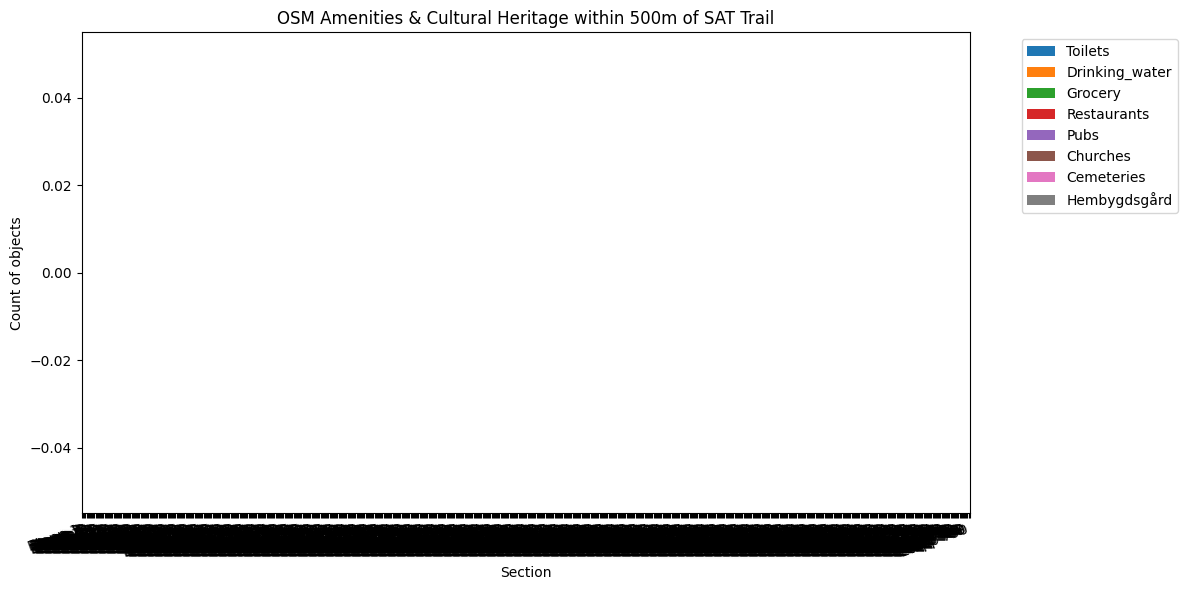

In [9]:
import matplotlib.pyplot as plt

df.set_index("Section").plot(
    kind="bar",
    stacked=True,
    figsize=(12,6)
)

plt.title("OSM Amenities & Cultural Heritage within 500m of SAT Trail")
plt.ylabel("Count of objects")
plt.xticks(rotation=20, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [2]:
 # End timer and calculate duration
end_time = time.time()
elapsed_time = end_time - start_time# Bygg audit-lager för den här etappen

# Print current date and total time
print("Date:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
minutes, seconds = divmod(elapsed_time, 60)
print("Total time elapsed: {:02.0f} minutes {:05.2f} seconds".format(minutes, seconds))


Date: 2025-09-28 22:22:46
Total time elapsed: 00 minutes 15.63 seconds
